<a href="https://colab.research.google.com/github/AnanditoKusuma/UAS-API-/blob/main/gradient%20boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Path file di Google Drive
file_path = '/content/drive/My Drive/furnicraftnesia.csv'

In [4]:
# Load dataset
data = pd.read_csv(file_path)


In [5]:
# Tampilkan 5 baris pertama untuk memastikan data terbaca
print("Contoh data:")
print(data.head())


Contoh data:
     Bulan      Kategori        Kota  Unit Terjual Harga per Unit  Diskon (%)  \
0  2024-01          Sofa     Jakarta           150      Rp500.000          10   
1  2024-01          Meja    Surabaya           120      Rp300.000           5   
2  2024-01         Kursi     Bandung           200      Rp100.000           0   
3  2024-01  Tempat Tidur  Yogyakarta            80      Rp800.000          15   
4  2024-02          Sofa     Jakarta           180      Rp500.000           5   

     Pendapatan  
0  Rp67.500.000  
1  Rp34.200.000  
2  Rp20.000.000  
3  Rp54.400.000  
4  Rp85.500.000  


In [6]:
# Pastikan kolom-kolom yang digunakan sesuai
# Misalnya: 'Unit Terjual', 'Harga per Unit', 'Diskon (%)', 'Pendapatan'
# Kita prediksi kolom 'Pendapatan'
# Preprocessing data
data['Harga per Unit'] = data['Harga per Unit'].replace('[Rp,.]', '', regex=True).astype(float)  # Ubah format harga
data['Pendapatan'] = data['Pendapatan'].replace('[Rp,.]', '', regex=True).astype(float)  # Ubah format pendapatan
data['Diskon (%)'] = data['Diskon (%)'].astype(float)  # Pastikan diskon dalam angka

In [7]:
# Feature dan target
X = data[['Unit Terjual', 'Harga per Unit', 'Diskon (%)']]  # Fitur
y = data['Pendapatan']  # Target

In [8]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Inisialisasi model Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [10]:
# Inisialisasi model Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [11]:
# Train model
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [12]:
# Prediksi
y_pred = model.predict(X_test)


In [13]:
# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("\nHasil evaluasi model:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")



Hasil evaluasi model:
Mean Absolute Error (MAE): 4282702.500109751
Mean Squared Error (MSE): 30035186142648.887
R-squared (R2): 0.9192374564254726


In [15]:
# Contoh prediksi
print("\nContoh prediksi:")
predicted_data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}).reset_index(drop=True)
print(predicted_data.head())


Contoh prediksi:
       Actual     Predicted
0  21000000.0  2.000077e+07
1  37050000.0  3.420039e+07
2  67500000.0  7.649927e+07


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
# Set gaya visualisasi
sns.set_style("whitegrid")

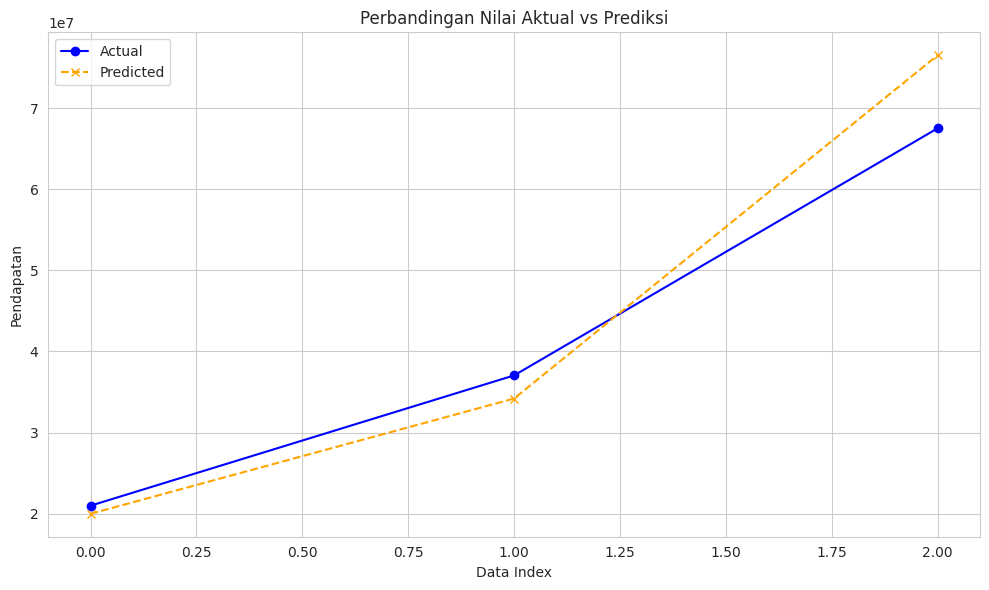

In [19]:
# Visualisasi perbandingan nilai aktual dan prediksi
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', marker='x', linestyle='--', color='orange')
plt.title('Perbandingan Nilai Aktual vs Prediksi')
plt.xlabel('Data Index')
plt.ylabel('Pendapatan')
plt.legend()
plt.tight_layout()
plt.show()

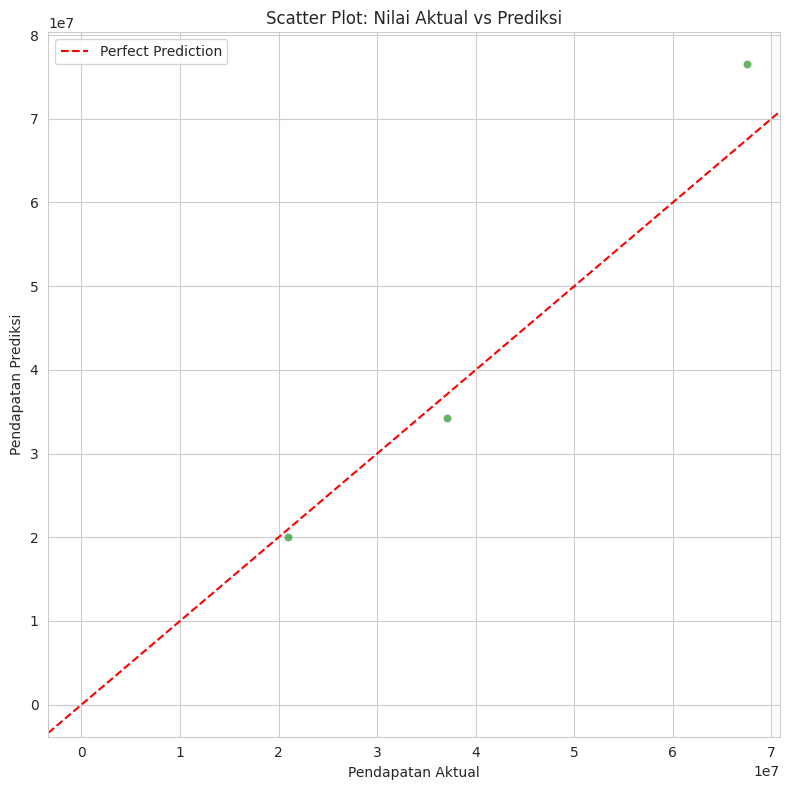

In [20]:
# Scatter plot untuk melihat distribusi prediksi terhadap nilai aktual
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred, color='green', alpha=0.6)
plt.title('Scatter Plot: Nilai Aktual vs Prediksi')
plt.xlabel('Pendapatan Aktual')
plt.ylabel('Pendapatan Prediksi')
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Perfect Prediction')
plt.legend()
plt.tight_layout()
plt.show()

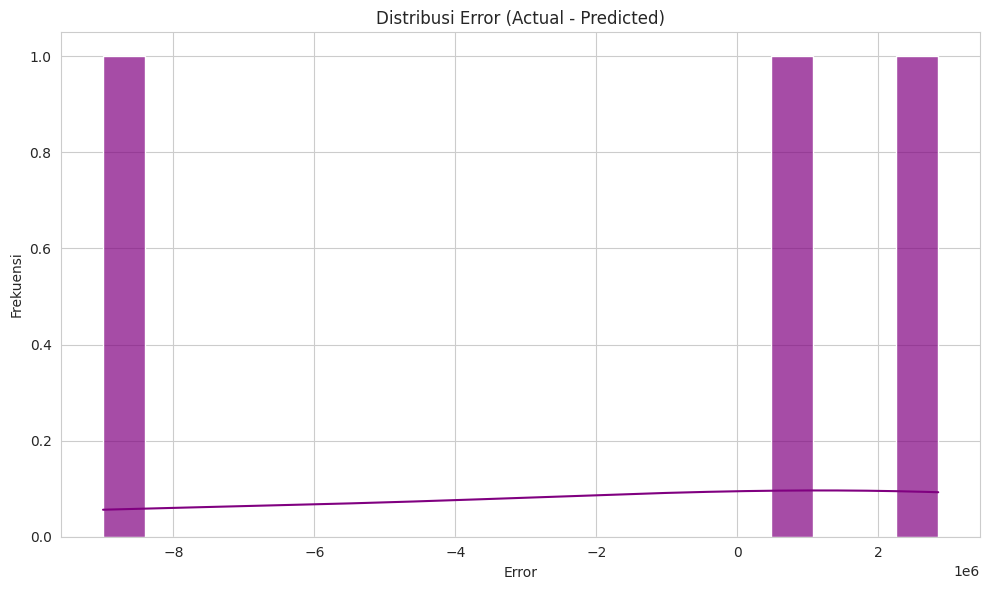

In [21]:
# Visualisasi Error Distribusi
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=20, kde=True, color='purple', alpha=0.7)
plt.title('Distribusi Error (Actual - Predicted)')
plt.xlabel('Error')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()